### Arrhythmia Dataset

+ Number of Samples: 109446
+ Number of Categories: 5
+ Sampling Frequency: 125Hz
+ Data Source: Physionet's MIT-BIH Arrhythmia Dataset
+ Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("./archive/mitbih_train.csv", header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [4]:
df1[187].unique() # Last column is label

array([0., 1., 2., 3., 4.])

In [5]:
df2 = pd.read_csv("./archive/mitbih_test.csv", header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [7]:
# Check data
class_names = {0: 'N (Normal)', 1: 'S (Supraventricular)', 2: 'V (Ventricular)', 
               3: 'F (Fusion)', 4: 'Q (Unknown)'}

X_train = df1.iloc[:, :-1]
y_train = df1.iloc[:, -1]

X_test = df2.iloc[:, :-1]
y_test = df2.iloc[:, -1]

In [8]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

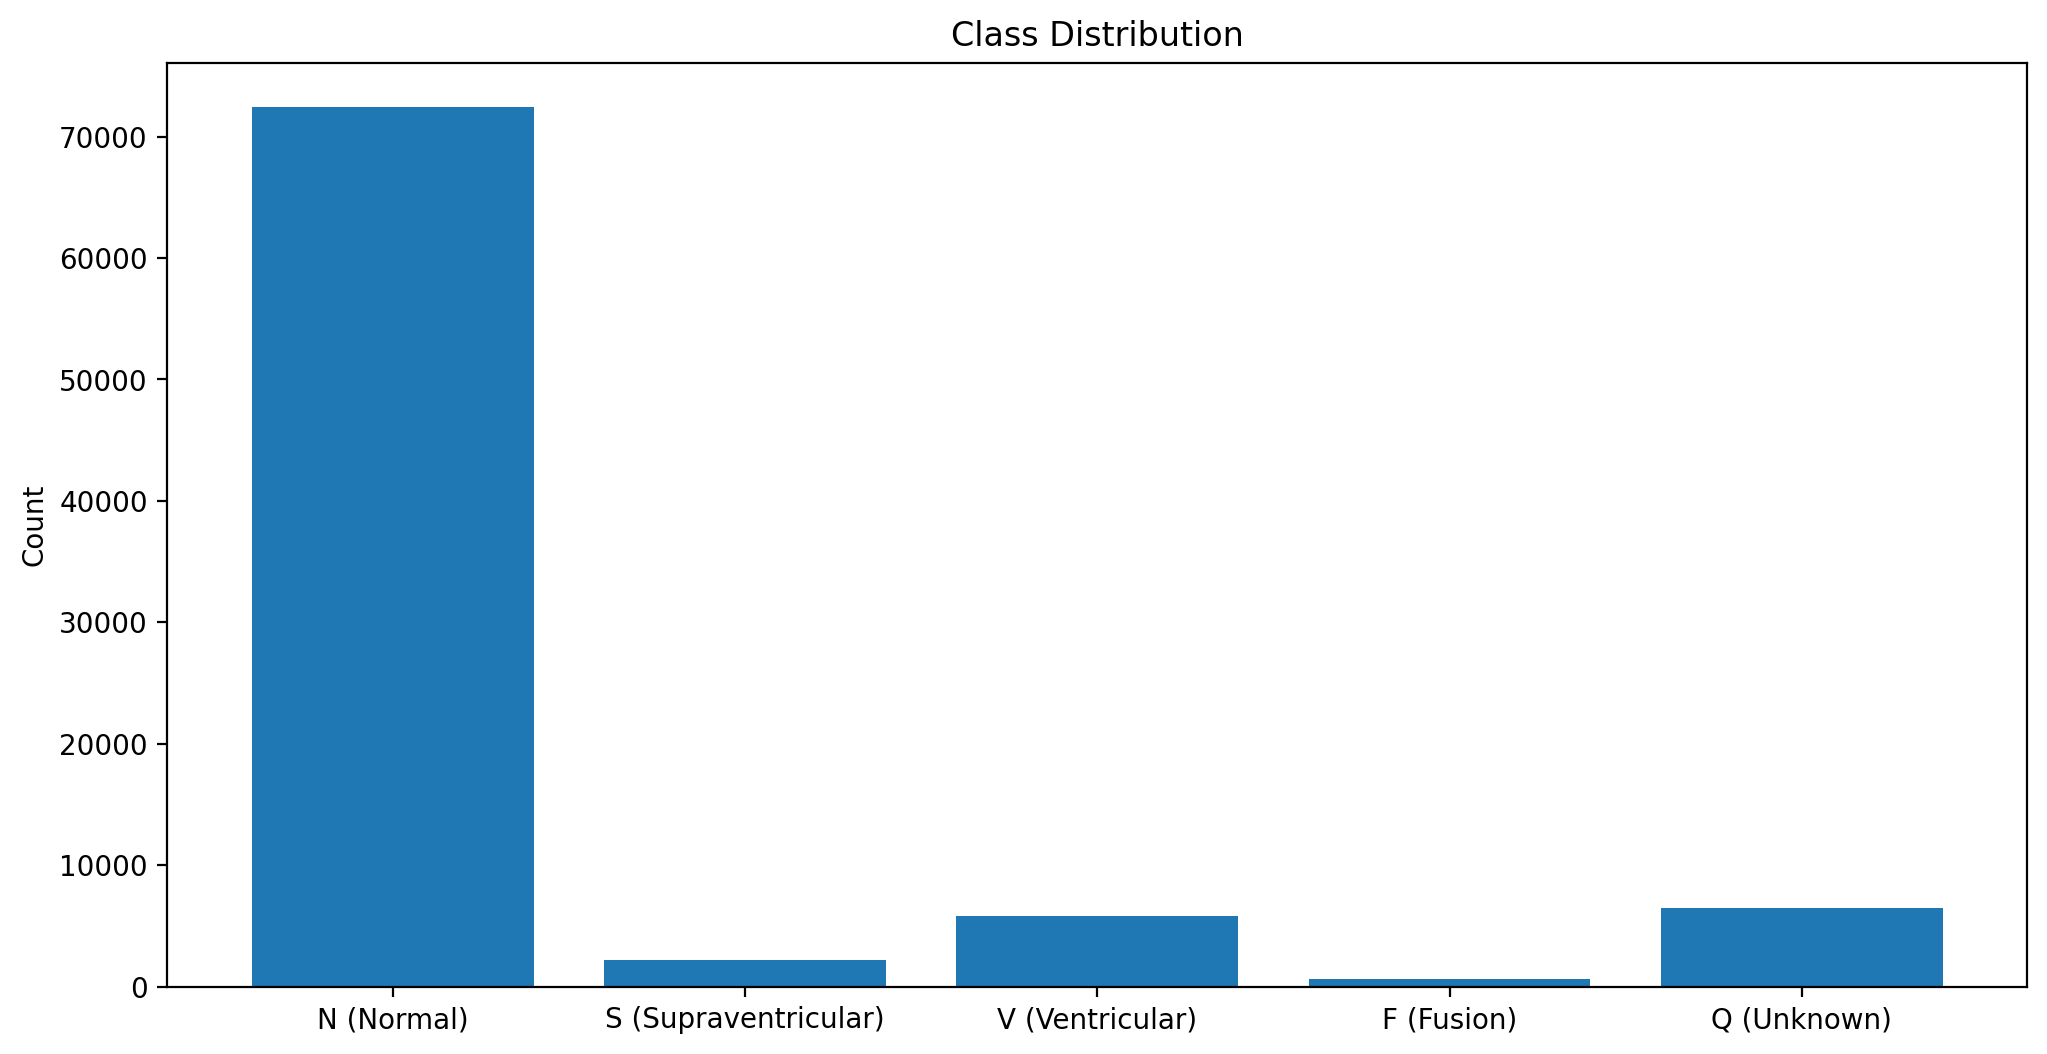

In [9]:
unique, counts = np.unique(y_train, return_counts = True)
x = [class_names[i] for i in unique]

fig = plt.figure(figsize = (12, 6), dpi = 200)
plt.bar(data = y_train, x = x, height = counts)
plt.title("Class Distribution")
plt.ylabel('Count')
plt.show()

### ==> Extreme Unbalanced Data

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

undersampler = RandomUnderSampler(sampling_strategy={0: 10000})  # Downsample N to 10000 samples
oversampler = RandomOverSampler(sampling_strategy={1: 10000, 2: 10000, 3: 10000, 4: 10000})  # Oversample minorities to 10000 each

# Apply pipeline
pipeline = ImbPipeline([
    ('under', undersampler),
    ('over', oversampler)
])

X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape, y_train.shape)
print("Balanced training set shape:", X_train_balanced.shape, y_train_balanced.shape)

Original training set shape: (87554, 187) (87554,)
Balanced training set shape: (50000, 187) (50000,)


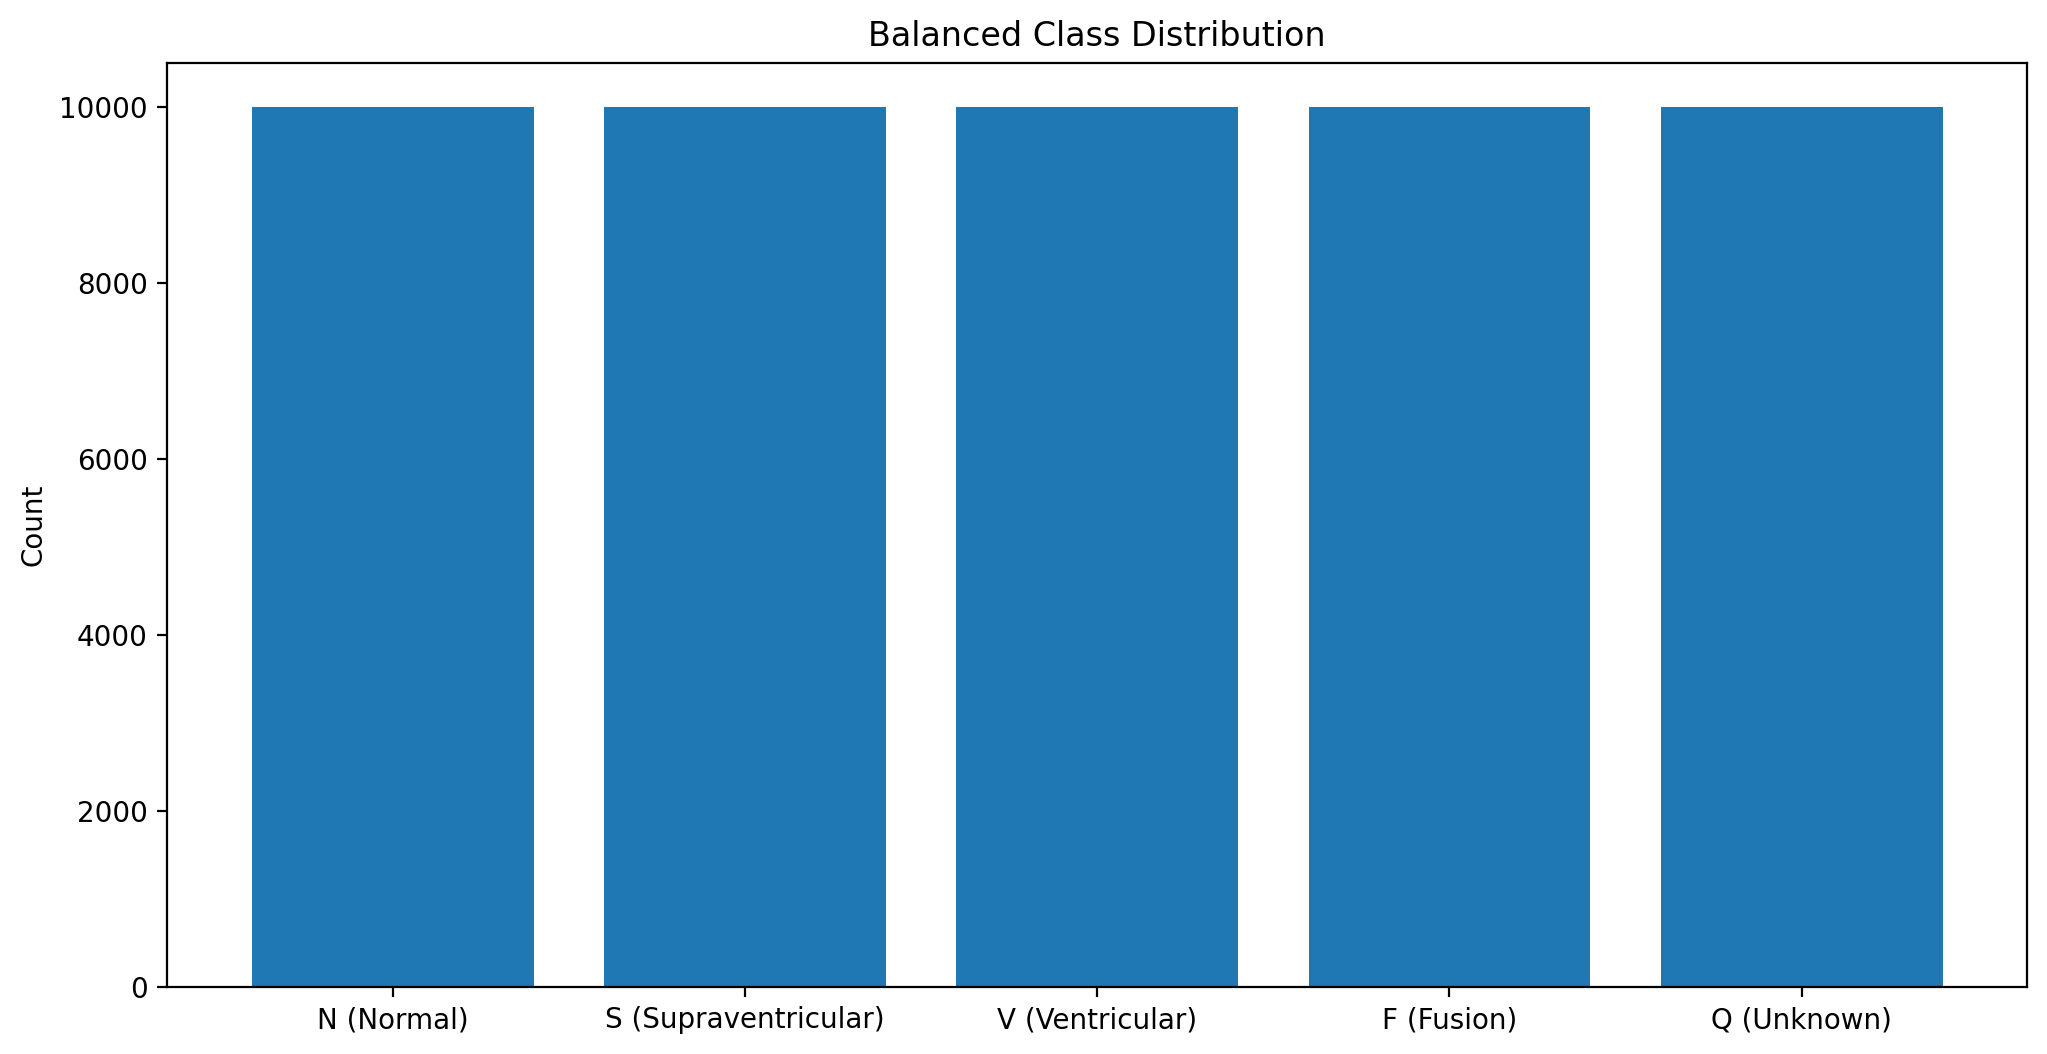

In [11]:
# Check new class distribution
unique_balanced, counts_balanced = np.unique(y_train_balanced, return_counts=True)
x_balanced = [class_names[i] for i in unique_balanced]

fig = plt.figure(figsize=(12, 6), dpi=200)
plt.bar(x_balanced, counts_balanced)
plt.title('Balanced Class Distribution')
plt.ylabel('Count')
plt.show()

In [12]:
# Update training data
X_train = X_train_balanced
y_train = y_train_balanced

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from model import ECG_CNN

model_cnn1d = ECG_CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_cnn1d.parameters(), lr=1e-3)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
print(f"Model is on: {next(model_cnn1d.parameters()).device}")
print(f"PyTorch sees CUDA: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device name: {torch.cuda.get_device_name(0)}")

Model is on: cpu
PyTorch sees CUDA: True
CUDA device name: NVIDIA GeForce RTX 3050 Laptop GPU


In [15]:
# Convert to Tensor
X_train = torch.from_numpy(X_train).float().unsqueeze(1) # (B, 1, 187)
y_train = torch.from_numpy(y_train).float() # (B, )

X_test = torch.from_numpy(X_test).float().unsqueeze(1)
y_test = torch.from_numpy(y_test).long()

In [16]:
# Dataloader
train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)

BATCH_SIZE = 32
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_set,  batch_size=BATCH_SIZE, shuffle=False)

In [17]:
EPOCHS = 30
model_cnn1d.to(device)

history = {'train_loss': [], 'train_acc': [],
           'test_loss':  [], 'test_acc':  []}

for epoch in range(1, EPOCHS + 1):
    model_cnn1d.train()
    running_loss, correct, total = 0.0, 0, 0

    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.long().to(device)

        optimizer.zero_grad()
        out = model_cnn1d(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * xb.size(0)
        _, predicted = torch.max(out, 1)
        total   += yb.size(0)
        correct += (predicted == yb).sum().item()

    train_acc = correct / total
    train_loss = running_loss / total

    # Test eval each epoch
    model_cnn1d.eval()
    test_loss, test_correct, test_total = 0.0, 0, 0
    with torch.no_grad():
        for xte, yte in test_loader:
            xte, yte = xte.to(device), yte.long().to(device)
            out_te = model_cnn1d(xte)
            test_loss += criterion(out_te, yte).item() * xte.size(0)
            test_correct += (out_te.argmax(1) == yte).sum().item()
            test_total   += yte.size(0)
    test_acc  = test_correct / test_total
    test_loss = test_loss / test_total

    # Store
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['test_loss'].append(test_loss)
    history['test_acc'].append(test_acc)

    print(f'Epoch {epoch:02d}  ||  train_loss {train_loss:.6f}  train_acc {train_acc:.6f}  ||  '
          f'test_loss {test_loss:.6f}  test_acc {test_acc:.6f}')

Epoch 01  ||  train_loss 0.359773  train_acc 0.867440  ||  test_loss 0.420430  test_acc 0.831993
Epoch 02  ||  train_loss 0.197686  train_acc 0.928600  ||  test_loss 0.353634  test_acc 0.874429
Epoch 03  ||  train_loss 0.153261  train_acc 0.945000  ||  test_loss 0.200278  test_acc 0.918372
Epoch 04  ||  train_loss 0.126035  train_acc 0.954960  ||  test_loss 0.194988  test_acc 0.930477
Epoch 05  ||  train_loss 0.104564  train_acc 0.962620  ||  test_loss 0.200770  test_acc 0.925863
Epoch 06  ||  train_loss 0.090110  train_acc 0.967860  ||  test_loss 0.199640  test_acc 0.930203
Epoch 07  ||  train_loss 0.080463  train_acc 0.971780  ||  test_loss 0.151360  test_acc 0.942719
Epoch 08  ||  train_loss 0.070609  train_acc 0.974440  ||  test_loss 0.141631  test_acc 0.954595
Epoch 09  ||  train_loss 0.067271  train_acc 0.976520  ||  test_loss 0.133613  test_acc 0.957016
Epoch 10  ||  train_loss 0.059569  train_acc 0.979660  ||  test_loss 0.126670  test_acc 0.961036
Epoch 11  ||  train_loss 0.057

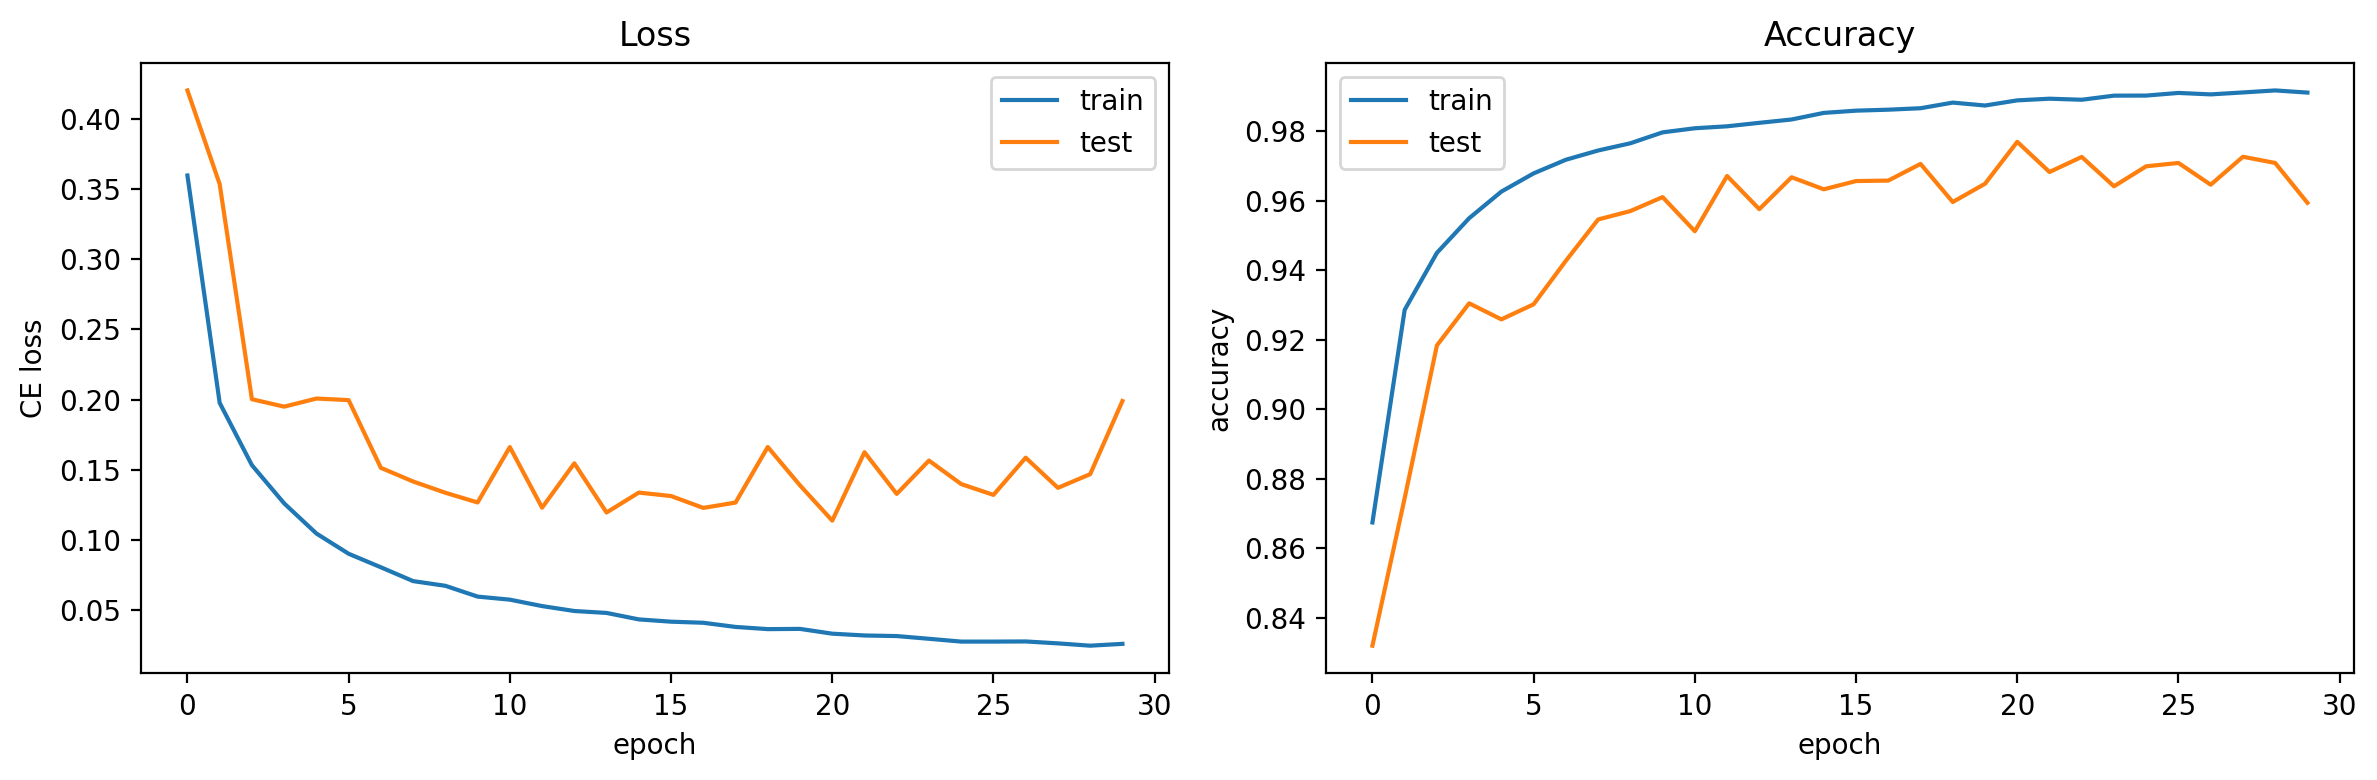

In [18]:
plt.figure(figsize=(12,4), dpi=200)

plt.subplot(1,2,1)
plt.plot(history['train_loss'], label='train')
plt.plot(history['test_loss'],  label='test')
plt.title('Loss'); plt.xlabel('epoch'); plt.ylabel('CE loss'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history['train_acc'], label='train')
plt.plot(history['test_acc'],  label='test')
plt.title('Accuracy'); plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend()

plt.tight_layout()
plt.show()

In [19]:
model_cnn1d.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        out = model_cnn1d(xb)
        all_preds.extend(out.argmax(1).cpu().numpy())
        all_labels.extend(yb.numpy())

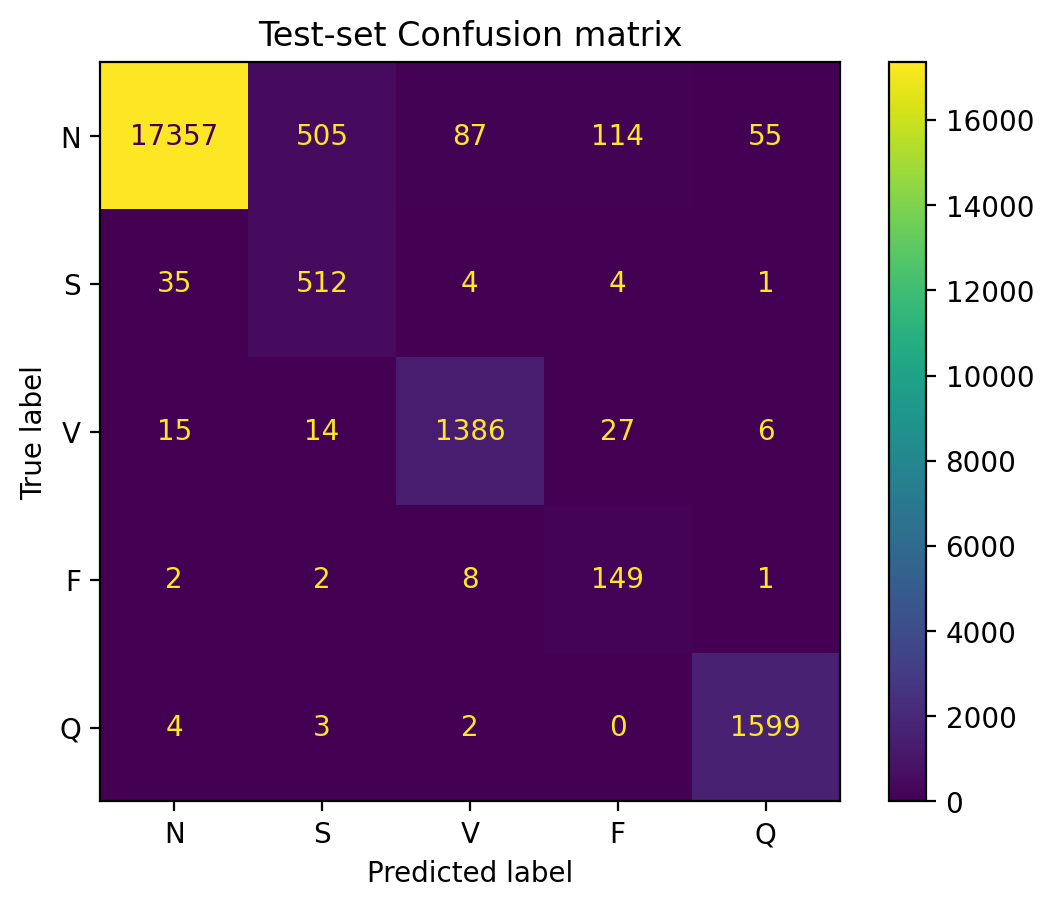

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_labels, all_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['N','S','V','F','Q'])
disp.plot(cmap='viridis', values_format='d')
plt.title('Test-set Confusion matrix')
plt.gcf().set_dpi(200)
plt.show()
